## Import Dependencies

In [1]:
import torch
import cv2 as cv
import matplotlib.pyplot as plt

import pandas as pd
from tqdm import tqdm

## Downloading YOLO

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model

Using cache found in /Users/mohamedmafaz/.cache/torch/hub/ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
/bin/sh: pip: command not found
requirements: ❌ Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 127.
YOLOv5 🚀 2023-9-24 Python-3.11.5 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [3]:
data_cam1 = pd.read_csv("walk_data_cam1.csv")
data_cam1.LocX = data_cam1.LocX.str.replace("[" , "").astype("float64")
data_cam1.LocZ = data_cam1.LocZ.str.replace("]" , "").astype("float64")
data_cam1 = data_cam1.drop(columns="LocZ" , axis=1)
data_cam1

,Frame,Distance,LocX,LocY
0,1,50.568724,-0.211293,8.121851
1,2,50.568724,-0.211293,8.121851
2,3,50.566764,-0.209846,8.107642
3,4,50.552435,-0.199176,8.002850
4,5,50.538319,-0.188506,7.898057
...,...,...,...,...
225,226,37.381474,-12.884773,-8.529395
226,227,37.288935,-12.987406,-8.553098
227,228,37.196470,-13.090038,-8.576802
228,229,37.104070,-13.192671,-8.600506


## Importing Lookup table and preporcessing it


In [4]:
data_cam2 = pd.read_csv("walk_data_cam2.csv")
data_cam2.LocX = data_cam2.LocX.str.replace("[" , "").astype("float64")
data_cam2.LocZ = data_cam2.LocZ.str.replace("]" , "").astype("float64")
data_cam2 = data_cam2.drop(columns="LocZ" , axis=1)
data_cam2

,Frame,Distance,LocX,LocY
0,1,42.964189,-0.211293,8.121851
1,2,42.964189,-0.211293,8.121851
2,3,42.951242,-0.209846,8.107642
3,4,42.855791,-0.199176,8.002850
4,5,42.760386,-0.188506,7.898057
...,...,...,...,...
225,226,26.876313,-12.884773,-8.529395
226,227,26.870016,-12.987406,-8.553098
227,228,26.864126,-13.090038,-8.576802
228,229,26.858649,-13.192671,-8.600506


## Adding bbox's Center , LocX and LocY 

In [7]:
null_encounters = 0

for cam in ["Cam1" , "Cam2"]:

    center_x = []
    center_y = []
    area = []


    for frame in tqdm(range(1,230 + 1)):
        link = f"{cam}/cam_1{frame:04d}.png"

        if model(cv.imread(link)).xywh[0].shape[0] != 0:
            x , y , w , h = model(cv.imread(link)).xywh[0][0][:4]
            x , y , w , h = float(x) , float(y) , float(w) , float(h)
            center_x.append((x + (w / 2)))
            center_y.append((y + (h / 2)))
            area.append((w * h))
            
        else:

            null_encounters += 1
            if cam == "Cam1":
                data_cam1 = data_cam1[data_cam1.Frame != frame]
            elif cam == "Cam2":
                data_cam2 = data_cam2[data_cam2.Frame != frame]

    if cam == "Cam1":
        data_cam1["Center_x"] = center_x
        data_cam1["Center_y"] = center_y
        data_cam1["Area"] = area
    elif cam == "Cam2":
        data_cam2["Center_x"] = center_x
        data_cam2["Center_y"] = center_y
        data_cam2["Area"] = area





100%|██████████| 230/230 [00:48<00:00,  4.73it/s]


In [6]:
null_encounters

29

In [ ]:
data_cam1

,Frame,Distance,LocX,LocY,Center_x,Center_y,Area,difference_
0,1,50.568724,-0.211293,8.121851,1559.256958,292.132660,4720.890720,13.869493
1,2,50.568724,-0.211293,8.121851,1559.697327,291.870598,4757.625006,13.869493
2,3,50.566764,-0.209846,8.107642,1559.552795,289.603569,4442.816539,13.867534
3,4,50.552435,-0.199176,8.002850,1562.484741,294.834953,4705.562976,13.853205
4,5,50.538319,-0.188506,7.898057,1565.834106,296.199585,4563.729400,13.839089
...,...,...,...,...,...,...,...,...
222,223,37.659485,-12.576876,-8.458282,634.831024,800.618195,7090.247925,0.960255
226,227,37.288935,-12.987406,-8.553098,611.717621,797.455780,13596.465677,0.589705
227,228,37.196470,-13.090038,-8.576802,607.908752,803.530548,15781.840525,0.497239
228,229,37.104070,-13.192671,-8.600506,606.280914,810.282410,17461.162368,0.404840


In [ ]:
data_cam2

,Frame,Distance,LocX,LocY,Center_x,Center_y,Area,difference_
0,1,42.964189,-0.211293,8.121851,321.077820,165.055729,2603.953113,16.164152
1,2,42.964189,-0.211293,8.121851,319.321335,164.854019,2384.499069,16.164152
2,3,42.951242,-0.209846,8.107642,322.214706,164.893158,2629.647474,16.151205
3,4,42.855791,-0.199176,8.002850,331.762955,164.043377,2822.929830,16.055754
4,5,42.760386,-0.188506,7.898057,340.152542,165.476639,3329.042456,15.960350
...,...,...,...,...,...,...,...,...
225,226,26.876313,-12.884773,-8.529395,1337.628906,407.863480,5611.135776,0.076276
226,227,26.870016,-12.987406,-8.553098,1340.999939,415.541489,6292.480280,0.069979
227,228,26.864126,-13.090038,-8.576802,1342.759766,419.438461,6318.115899,0.064089
228,229,26.858649,-13.192671,-8.600506,1345.005310,420.920929,6603.624156,0.058612


## Function to get Distance(from camera to person) and LocX and LocY corresponding to it

In [ ]:
def get_dis_Loc(link : str , look_up_table : pd.core.frame.DataFrame , h_ = 1.6 , f = 1714) -> tuple[float , float , float]:
  """
  Input : Gets Image
  Output : relates it to lookup table and gets LocX and LocY

  """

  d_ , LocX , LocY = 0 , 0 , 0

  link = link
  img = cv.imread(link)
  result = model(img)
  if result.xyxy[0].shape[0] != 0:

    cordinates = result.xywh[0].cpu().numpy()[0]
    
    Center_x = cordinates[0] + (cordinates[2] / 2)
    Center_y = cordinates[1] + (cordinates[3] / 2)

    d_ = (h_ * f / cordinates[3])
    look_up_table["difference_"] = abs(look_up_table["Distance"] - d_)

    data_sub = look_up_table.copy()
    data_sub["Center_x_"] = abs(data_sub["Center_x"] - Center_x)
    data_sub["Center_y_"] = abs(data_sub["Center_y"] - Center_y)
    
    data_sub["Center_difference_"] = (data_sub["Center_x_"] + data_sub["Center_y_"])/2

    data_min = data_sub["Center_difference_"].idxmin()
    LocX = look_up_table.at[data_min , "LocX"]
    LocY = look_up_table.at[data_min , "LocY"]

   
  else:
    LocX = 0
    LocX = 0
    LocX = 0
  # If prediction doesnt happen then return prevous data as new (helps in keeping plotting in order)

  return d_ , LocX , LocY

### Testing focal length , and above function

#### For camera 1

In [ ]:
f_cam1 = (36.7 * 167.28) / 1.6
f_cam1

3836.985

In [ ]:
d_ , LocX , LocY  = get_dis_Loc(link = "Cam1/cam_10230.png" , look_up_table = data_cam1 , h_ = 1.6 , f = f_cam1)
d_ , LocX , LocY 
print(f"Predicted distance (Camera to person) : {d_}\nPredicted Location X : {LocX}\nPredicted Location Y : {LocY}")

Predicted distance (Camera to person) : 36.69923032078906
Predicted Location X : -13.29530143737793
Predicted Location Y : -8.62421035766602


In [ ]:
print(f"Actaul distance (Camera to person) : {float(data_cam1[data_cam1.Frame == 230].Distance)}\nPredicted Location X : {float(data_cam1[data_cam1.Frame == 230].LocX)}\nPredicted Location Y : {float(data_cam1[data_cam1.Frame == 230].LocY)}")

Actaul distance (Camera to person) : 37.0117421977993
Predicted Location X : -13.29530143737793
Predicted Location Y : -8.62421035766602


#### For camera 2

In [ ]:
f_cam2 = (26.8 * 130.979) / 1.6
f_cam2

2193.89825

In [ ]:
d_ , LocX , LocY  = get_dis_Loc(link = "Cam2/cam_10230.png" , look_up_table = data_cam2 , h_ = 1.6 , f = f_cam2)
d_ , LocX , LocY 
print(f"Predicted distance (Camera to person) : {d_}\nPredicted Location X : {LocX}\nPredicted Location Y : {LocY}")

Predicted distance (Camera to person) : 26.800036666531533
Predicted Location X : -13.29530143737793
Predicted Location Y : -8.62421035766602


In [ ]:
print(f"Actaul distance (Camera to person) : {float(data_cam2[data_cam2.Frame == 230].Distance)}\nPredicted Location X : {float(data_cam2[data_cam2.Frame == 230].LocX)}\nPredicted Location Y : {float(data_cam2[data_cam2.Frame == 230].LocY)}")

Actaul distance (Camera to person) : 26.8535832434689
Predicted Location X : -13.29530143737793
Predicted Location Y : -8.62421035766602


### Function to patch UNIDENTIFIED Distance, Location

In [ ]:
def patch_prev(List : list , find , replace = None):
    """
    Replaces the "find" with the previous value
    """
    track = None
    for index in range(len(List)):
        if List[index] == find:
            if index == 0:
                raise Exception("First index cannot be the one to replace")
            else:
                if replace is None:
                    List[index] = track
                else:
                    List[index] = replace
        
        track = List[index]
    return List

In [ ]:
# plt.xlim(-30 , 30)
# plt.ylim(-30 , 30)

LocX_cam1 = []
LocY_cam1 = []
distance_cam1 = []

for frame in tqdm(range(1 , 230 + 1)) :
    link = f"Cam1/cam_1{frame:04d}.png"
    # print(link)
    d_ , LocX , LocY = get_dis_Loc(link = link , look_up_table = data_cam1 , h_ = 1.6 , f = f_cam1)
    LocX_cam1.append(LocX)
    LocY_cam1.append(LocY)
    distance_cam1.append(d_)


100%|██████████| 230/230 [00:30<00:00,  7.51it/s]


# Plotting

### For camera 1

In [ ]:
LocX_cam1 = patch_prev(LocX_cam1 , find = 0)
LocY_cam1 = patch_prev(LocY_cam1 , find = 0)
distance_cam1 = patch_prev(distance_cam1 , find = 0)

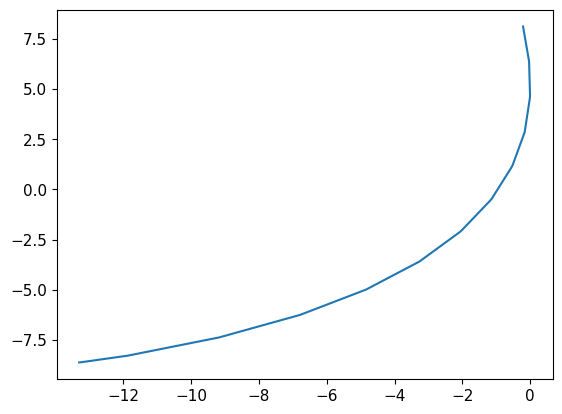

In [ ]:
plt.plot(LocX_cam1 , LocY_cam1)

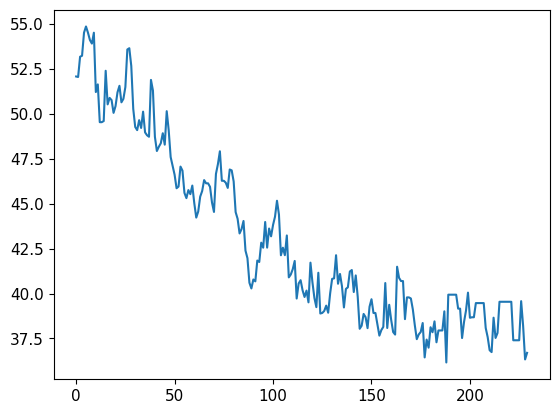

In [ ]:
plt.plot(distance_cam1)

### For camera 2

In [ ]:


LocX_cam2 = []
LocY_cam2 = []
distance_cam2 = []

for frame in tqdm(range(1 , 230 + 1)) :
    link = f"Cam2/cam_1{frame:04d}.png"
    # print(link)
    d_ , LocX , LocY = get_dis_Loc(link = link , look_up_table = data_cam2 , h_ = 1.6 , f = f_cam2)
    LocX_cam2.append(LocX)
    LocY_cam2.append(LocY)
    distance_cam2.append(d_)


100%|██████████| 230/230 [00:30<00:00,  7.42it/s]


In [ ]:
LocX_cam2 = patch_prev(LocX_cam2 , find = 0)
LocY_cam2 = patch_prev(LocY_cam2 , find = 0)
distance_cam2 = patch_prev(distance_cam2 , find = 0)

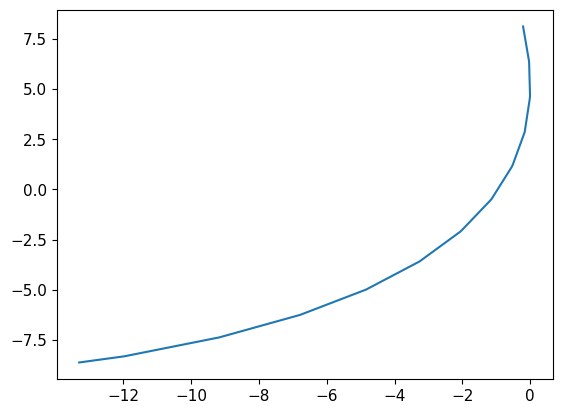

In [ ]:
plt.plot(LocX_cam2 , LocY_cam2)

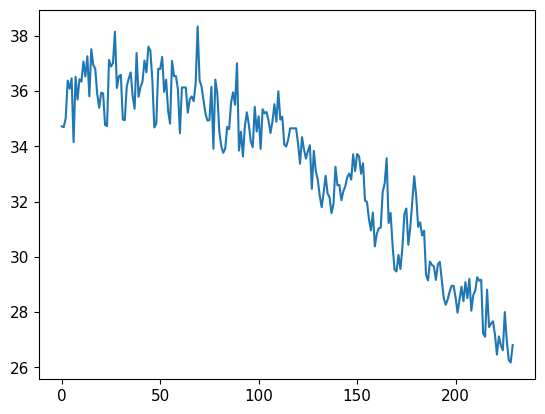

In [ ]:
plt.plot(distance_cam2)